In [120]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

1. **Download and Load Dataset**

In [121]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zadafiyabhrami/global-crocodile-species-dataset")
path = os.path.join(path , 'crocodile_dataset.csv')

c_dataset = pd.read_csv(path)

Using Colab cache for faster access to the 'global-crocodile-species-dataset' dataset.


In [122]:
frame = pd.DataFrame(c_dataset)
frame[10:20]

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
10,11,West African Dwarf Crocodile,Osteolaemus tetraspis,Crocodylidae,Osteolaemus,1.22,15.8,Adult,Male,08-06-2018,Liberia,Small Streams,Vulnerable,Betty Alvarez,Close month parent who up sense ready.
11,12,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.84,60.7,Adult,Male,19-10-2019,Belize,Lagoons,Least Concern,Jennifer Powers,Just military building different full open dis...
12,13,Siamese Crocodile,Crocodylus siamensis,Crocodylidae,Crocodylus,2.63,121.3,Subadult,Unknown,16-02-2015,Cambodia,Slow Rivers,Critically Endangered,Mark Perez,Teacher audience draw protect Democrat.
13,14,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,3.65,217.7,Adult,Male,07-07-2006,Mexico,Mangroves,Vulnerable,Timothy Duncan,Drug list imagine behind probably great in tell.
14,15,West African Dwarf Crocodile,Osteolaemus tetraspis,Crocodylidae,Osteolaemus,1.32,19.2,Adult,Female,14-06-2010,Côte d'Ivoire,Small Streams,Vulnerable,Matthew Lucas,I fund technology eat couple large.
15,16,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.00,67.9,Adult,Unknown,18-03-2007,Mexico,Rivers,Least Concern,Donald Wright,Kitchen technology nearly anything yourself st...
16,17,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.98,61.5,Juvenile,Unknown,14-03-2007,Mexico,Lagoons,Least Concern,Sarah Martin,Loss ten total clearly able hospital unit size...
17,18,Nile Crocodile,Crocodylus niloticus,Crocodylidae,Crocodylus,4.37,565.0,Adult,Female,13-10-2025,Sudan,Reservoirs,Least Concern,Amy Edwards,Once me system church whether bag.
18,19,Borneo Crocodile (disputed),Crocodylus raninus,Crocodylidae,Crocodylus,1.07,31.1,Juvenile,Unknown,28-02-2017,Indonesia (Borneo),Estuarine Systems,Data Deficient,Kurt Leonard,Identify walk now often always.
19,20,Saltwater Crocodile,Crocodylus porosus,Crocodylidae,Crocodylus,1.55,350.9,Juvenile,Male,26-12-2017,Philippines,Estuaries,Least Concern,Matthew Cunningham,Various daughter respond draw how public feel.


2. **Data Preprocessing**

In [123]:
# Drop irrelevant columns

columns_to_drop = ['Observation ID', 'Scientific Name', 'Common Name',
                   'Family', 'Observer Name', 'Notes', 'Conservation Status', 'Date of Observation']
c_dataset = c_dataset.drop(columns=columns_to_drop)

In [124]:
# Drop columns with too many unique values (e.g., Country/Region, Habitat Type)
print(c_dataset['Country/Region'].nunique())
print(c_dataset['Habitat Type'].nunique())

c_dataset = c_dataset.drop(columns =['Habitat Type' , 'Country/Region'], axis =1)

47
29


In [125]:
# Handle missing values if any
print("Missing values before handling:", c_dataset.isnull().sum())

Missing values before handling: Genus                   0
Observed Length (m)     0
Observed Weight (kg)    0
Age Class               0
Sex                     0
dtype: int64


In [126]:
# Encode 'Sex' get_dummies
c_dataset = pd.get_dummies(c_dataset, columns=['Sex'], dtype=int)

In [127]:
c_dataset['Age Class'].unique()

array(['Adult', 'Juvenile', 'Subadult', 'Hatchling'], dtype=object)

In [128]:
# Map Age Class to numerical values
age_mapping = {
    'Hatchling': 0,
    'Juvenile': 1,
    'Subadult': 2,
    'Adult': 3
}

c_dataset['Age Class'] = c_dataset['Age Class'].map(age_mapping)

In [129]:
# Encode 'Genus' using LabelEncoder
le = LabelEncoder()
c_dataset['Genus'] = le.fit_transform(c_dataset['Genus'])

In [130]:
c_array = c_dataset.values
X = c_array[:, 1:]  # Features
y = c_array[:, 0]   # Target


print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

Features shape (X): (1000, 6)
Target shape (y): (1000,)


3. **Train-Test Split**

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

4. **Model Training with Cross-Validation**

In [132]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [133]:
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-validation scores: [0.86875 0.875   0.86875 0.8375  0.875  ]
Mean CV Accuracy: 0.86


In [134]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

5. **Evaluation**

In [135]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.86


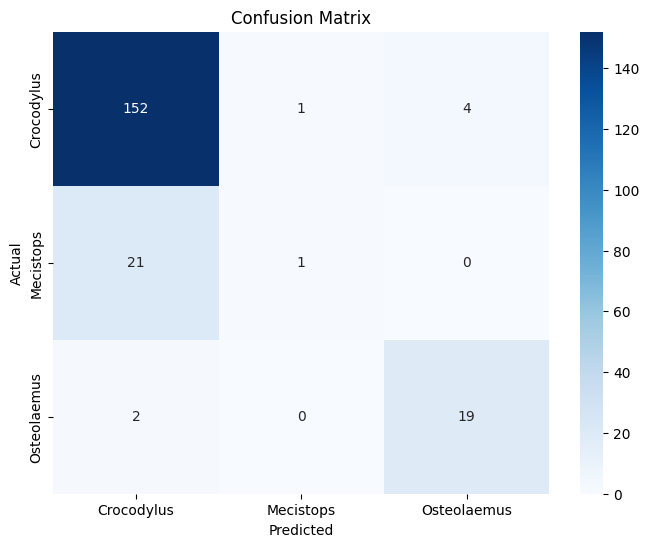

In [136]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()